<a href="https://colab.research.google.com/github/deven96/fashion_mnist/blob/master/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

Using TensorFlow backend.


x_train shape: (60000, 28, 28) y_train shape: (60000,)


# Visualizing the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 9 Ankle boot


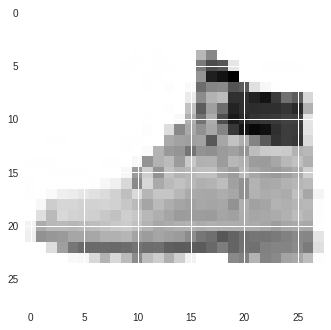

In [2]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 90
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

# Data Normalization

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [5]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


# Model Architecture

Tweak CNN parameters to optimize

In [34]:
     


# Model
inputs = tf.keras.layers.Input(shape=(28, 28, 1), name="input")
# Add convolution 2D
x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 name="conv_1")(inputs)
# skip = tf.keras.layers.Add(name='skip_1')([inputs, x])
x = tf.keras.layers.MaxPooling2D((2, 2), name="maxpool_1")(x)
x = tf.keras.layers.Dropout(0.25, name="dropout_1")(x)
x = tf.keras.layers.Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu',
                 name="conv_2")(x)
x = tf.keras.layers.MaxPooling2D((2, 2), name="maxpool_2")(x)
x = tf.keras.layers.Dropout(0.25, name="dropout_2")(x)
x = tf.keras.layers.Conv2D(128,
                 kernel_size=(3, 3), 
                 activation='relu',
                 name="conv_3")(x)
x = tf.keras.layers.Dropout(0.5, name="dropout_3")(x)
x = tf.keras.layers.Flatten(name="vector_3")(x)
x = tf.keras.layers.Dense(128, activation='relu', name="fc_4")(x)
x = tf.keras.layers.Dropout(0.3, name="dropout_4")(x)
predictions = tf.keras.layers.Dense(10, activation='softmax', name='fc_output')(x)

# Take a look at the model summary

model = tf.keras.models.Model(inputs=inputs, outputs=predictions)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 11, 11, 64)        18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
__________

# Plot the model

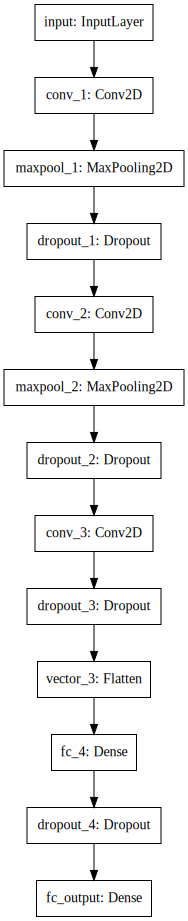

In [23]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Compile the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Train the model

Using the .fit() API

In [0]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=60,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 10000 samples
Epoch 1/60
54976/55000 [============================>.] - ETA: 0s - loss: 0.6977 - acc: 0.7389
Epoch 00001: val_loss improved from inf to 0.44946, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 11s 207us/step - loss: 0.6976 - acc: 0.7389 - val_loss: 0.4495 - val_acc: 0.8289
Epoch 2/60
54912/55000 [============================>.] - ETA: 0s - loss: 0.4485 - acc: 0.8358
Epoch 00002: val_loss improved from 0.44946 to 0.34442, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 10s 184us/step - loss: 0.4485 - acc: 0.8358 - val_loss: 0.3444 - val_acc: 0.8785
Epoch 3/60
54720/55000 [============================>.] - ETA: 0s - loss: 0.3862 - acc: 0.8610
Epoch 00003: val_loss improved from 0.34442 to 0.31438, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 10s 184us/step - loss: 0.3862 - acc: 0.8611 - val_loss: 0.3144 - val_acc: 0.88

# Save trained model

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [27]:
#load best weight, cnn arch_diagram and save to drive
model.load_weights('model.weights.best.hdf5')
model.save('fashion_mnist_trained.h5')
model_file = drive.CreateFile({'title' : 'fashion_mnist_trained.h5'})
arch_diagram = drive.CreateFile({'title' : 'fashionNET.png'})
model_file.SetContentFile('fashion_mnist_trained.h5')
arch_diagram.SetContentFile('model.png')
model_file.Upload()
arch_diagram.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1CyYool0iKKbc4oGKTMEoRVtiHJrY8qoB'})

# Predict values

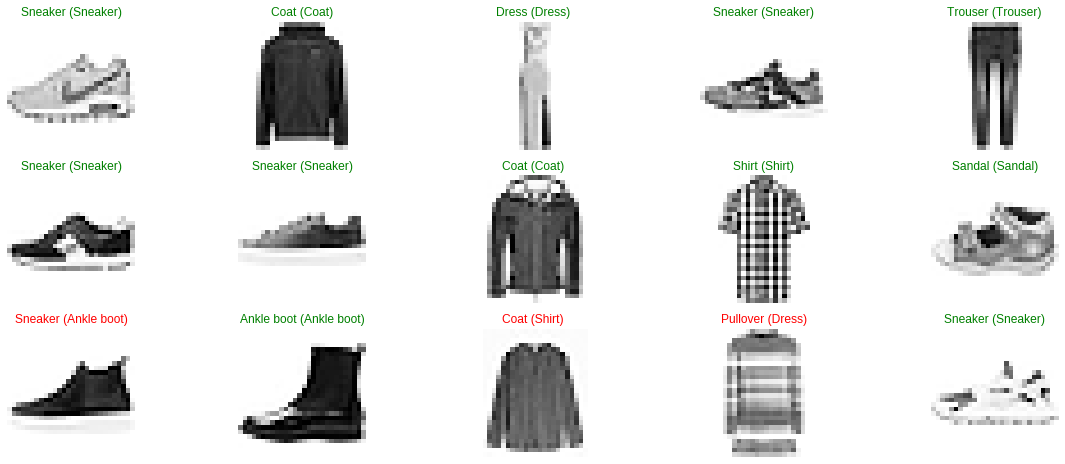

In [32]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [33]:
model.load_weights('model.weights.best.hdf5')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21355902724266052
Test accuracy: 0.9272
